# Multimodal: Getting started Image + Text

In [ ]:
#Install these required dependencies to run this notebook
!pip install python-dotenv==1.0.0
!pip install requests
!pip install sseclient-py==1.8.0
!pip install pdf2image==1.17.0
!pip install langchain-sambanova==0.2.0

In [1]:
import os
import sys
import base64
import requests

import json
from pprint import pprint
from IPython.display import HTML, display

import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

current_dir = os.getcwd()
kit_dir =  current_dir
repo_dir = os.path.abspath(os.path.join(current_dir, ".."))

sys.path.append(repo_dir)

from dotenv import load_dotenv

load_dotenv(os.path.join(repo_dir, '.env'), override=True)

False

## Pass images to the Sambanova Multimodal Models

First you will need to instantiate the SambastudioMultimodal model wrapper, and set it with the desired parameters

In [2]:
from langchain_sambanova import ChatSambaNova

lvlm=ChatSambaNova(
    model="Llama-4-Maverick-17B-128E-Instruct", 
    temperature = 0.01
)

### Using an image through an URL

You can pass directly an URL containing an image to the model wrapper as shown here

In [3]:
def url_to_b64(url: str) -> str:
    """
    Converts an image from a URL to a base64 encoded string.

    :param str url: The URL of the image.
    :return: The base64 encoded string representation of the image.
    :rtype: str
    """
    response = requests.get(url, verify=False)
    try:
        if response.status_code == 200:
            image_binary = response.content
            base64_image = base64.b64encode(image_binary).decode()
            return f'data:image/jpeg;base64,{base64_image}'
        else:
            raise ValueError(f'Unable to retrieve image from URL status code {response.status_code}')
    except Exception as e:
        raise ValueError(f"Can't encode image to b64 from provided url: {e}")


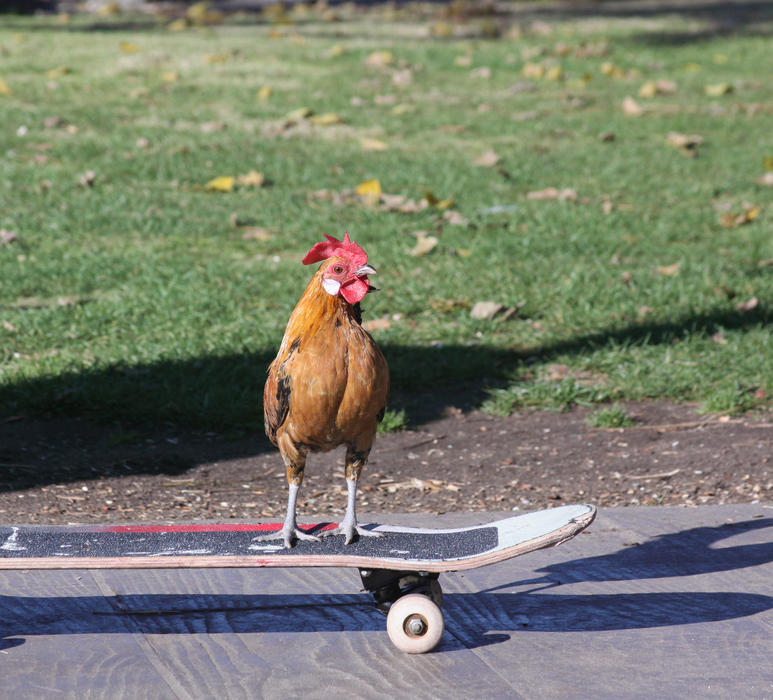

The image depicts a rooster standing on a skateboard, with the following elements visible:

*   **Rooster**: The rooster is positioned in the center of the image, facing to the right. It has a distinctive red comb and wattle, and its plumage is a vibrant orange-brown color. Its legs are white, and it stands on the skateboard with its feet shoulder-width apart.
*   **Skateboard**: The skateboard is black and white, featuring a red stripe along its edge. It appears to be stationary, with the rooster standing on it. The skateboard is placed on a paved surface, which is likely a sidewalk or path.
*   **Background**: In the background, there is a grassy area with scattered leaves, suggesting that the scene is set during autumn. The overall atmosphere of the image is one of playfulness and humor, as the rooster's presence on the skateboard creates a sense of unexpectedness and whimsy.

Overall, the image presents a unique and amusing scene, with the rooster's confident stance on the skateboa

In [4]:
image_url = 'https://www.freeimageslive.co.uk/files/images005/skateboard-chicken.preview.jpg'
display(HTML(f'<img src="{url_to_b64(image_url)}" style="max-height: 300px;"/>'))

result = lvlm.invoke(
    [
        {
            'role': 'user',
            'content': [
                {'type': 'image_url', 'image_url': {'url': url_to_b64(image_url)}},
                {'type': 'text', 'text': 'what can you see in the image?'},
            ],
        }
    ]
)

print(result.content)

### Using a file path

You can pass the path of your image to the model wrapper as shown here

In [5]:
def image_to_base64(image_path: str) -> str:
    """
    Converts an image file to a base64 encoded string.

    :param: str image_path: The path to the image file.
    :return: The base64 encoded string representation of the image.
    rtype: str
    """
    with open(image_path, 'rb') as image_file:
        image_binary = image_file.read()
        base64_image = base64.b64encode(image_binary).decode()
        return f'data:image/jpeg;base64,{base64_image}'

In [6]:
image_path = "data/sample_docs/sample.png"
display(HTML(f'<img src="{image_path}" style="max-height: 300px;"/>'))

result = lvlm.invoke(
    [
        {
            'role': 'user',
            'content': [
                {'type': 'image_url', 'image_url': {'url': image_to_base64(image_path)}},
                {'type': 'text', 'text': 'what is the title of the plot?'},
            ],
        }
    ]
)

print(result.content)

The title of the plot is "Number of Birds on a Tree vs Time of the day".


### Using a Base 64 image

You are also able to sent to the model wrapper images encoded in base64, this can be useful when having in memory images


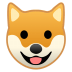

The image depicts a cartoon representation of a dog's face, specifically a Shiba Inu. The dog is characterized by its distinctive orange and white fur, with a black nose and mouth, and a pink tongue visible in its open mouth. The overall appearance of the dog is friendly and approachable, with a cheerful expression on its face.


In [7]:
b64_image="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEgAAABICAMAAABiM0N1AAAACXBIWXMAAA7EAAAOxAGVKw4bAAADAFBMVEVHcEzvqTrupTbxqzzSkE7wqjvupjf+9+AAAAD+67LtpDTsozPzsELroC/89d71tEb2tkj28NnUkk/nmCf+gYHlliOueTzTkU7TkU6wfT66gUHUkU7UkU7WlE/uqkLUkk/enk/7wFbTkU6UaDSvez7Ukk7UklDTkU7Vk03jnkL43q7IiUjTkUvQkE3TkU7rrFG4f0XVlUrjok3TkU7amU/mp1HOkUnQj01eQBJlRRTnp07UklDiok/Zl07ToWzhoFHan0rTkk8+PTjUkk7WlE7UkU6Tj4FfXVixekL2tkzZnU7hoU9iMjIxMCz+6rCYTU2fbSKTZB7ckyg7KAvHiClzThfXlk7qzqVycW3q0ars38XWzLTRj03+67H56s0EAgFRT0jPaWk7EOLy7EP/+OHqni7TkU8AAADvqDjyrD7/7LP0sUPyrj/sojLzr0D4t0rmlyX1skT58tzr5dD3tUf07dfy69XllSPu6NLjkR74uUvp483nmCfkkyHpnSzwqjr8wFPomyrpnCvtpDP/goLm4Mvj3cnYlk7roC8XFxbg28bOybbb1cHQy7j6vE//9+AtLSz+9t7W0b3Y0783NzdVVVVCQkDd2MTxqzzvpjfupTbUz7vWlE7SzblLS0siIiLUl1kODQz38NnamU/4uVB9em7rpUHh0LL6xGH7vlH2tEb65LvyxoL+9NnnnTXnpk3Vml0dEQkdHBrDvq0pGwdSNw/YlEnrqkzemEHXnmLaoWb6zHUFAgLHwrEJBwb+4p7LxrOhnZDTlFTssly+uanlxJr4xGX0uFPxs1ELCglnZFv+6a3SuZeFgnbPv6X11Z/87Mr56crwv3LenU771IP+5aUkFBPRvp/83ZYkIyDQroXcyamaloj0zZD3wF/+gYHSpXT7yWr+6KrmdXW9X191ThXWjiWIXR18UhWtdCDmv5Dw1rG2saHtsFXVtY2AQUHaqnTjo1GzW1v2fHy6gCi5gCj98tb+67Leu5D+6rA8Hh54PT3PaWlHcEzjsQDwpuBYd+XqAAABAHRSTlMA/v7+/v7+/v7+/v7+///+/v7+/v7+EOz4CSGTnPH+1qL+0QMXpsqIe/7+T2FH5f4vUf6001E8aP7+Yd1r5v6SJa/+usJ2/v4+/jN//v7+/v7+/v7+/vn+/v7+/lj+/v7+/v7/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////AP/+1Ae1twAABvhJREFUWMPVmHdUU1ccx1GfJhEQDCtCiEDYKggoaBFQnLj3bEt7DlxaEJVaR2NFQAGxNghWO4xtkF32Xo0M2Xsp7r336G7/6H0reYNItP+0n3N+7/zu9/7e9928vHfvuU9L67/LVAufhW92xkIfi6lsdQZAEL7POM1txlnwEQTMYMnmsqYnyWDKTE19Zk4Byc1NMnPmpScA54gIyxfAfKqGN8IcvLCMiHAGkxgd9qA5AuLM5y/SxGcR4Duj9c3AntEjBCmZKM2xwGLIGyW2ALFNWHkTMGP0zQLSzBvV/RGZKclgjvEQRhYgGV62v7oqUwpsGH2z+VJpNS+4OkOa0oeobrnY1N3lHYiLu6mY1IxRH6nl+WBeGzSazTCylUmlS3mw74Y0xRWYL7KGJ0z1mbIWPhQIGghYO8ViBryA9QwvJNlPmnEWFvMspbI5DCMrmUTKQ/uW3pBIyviA7+WFPiaxfa55eWV5eXmufbHQD5h7wS5XP0nGTaw4QyKzZRiNj5VYYn28PzIkEr+8ZJks2bXMT0LBrzmvD6p5ULSEPmhxo0RmxTLamhKMc1aydSjOE6WNW2PZRvop+IiCeVf19T/Vx4OekK0UopDXqM8akZVM3480atTY6CrbyFamp78U72/z09P7UQ8PeqJsVRNGlnqsf22OLCysDf/hVWFD0vgbXpoSxnqO3EBICPZo8PpDNKAKH5FeCJjFMLIBOjrnYd97VSE6kBAi6Aml1dgGi2/q6LBeESEQbennBZ+9ukVDmuB9Or9FxHpp7YBos19Vo85mjdG5WtW0WQTsWPNR2sdvQRqYyzDyAGkjRoz4hgg1CVtOAxNZU63DyJEj9xGhJmHLDmACw2gBcBg2bNg+ItQkbNkBTGYYWYPyj96CcsCaTU1KR40a9S0RahK2XGrC9DEWlA4fPvw7ItQkbLlUwBzRROAwevTo/USoSdiyA+tfswG52tra+4nQ/nn6tOWh2lQFO4Qunzb9F5rMekWcSkMp3AuClOiGMtAtQfV7VKnUie5jCsp1IQfxWO0fxOVyg1aoFPywApP9V1PkcmBKfx6R8kDIQTzWcLEzVqkU/LAKk7lrKHI54kJ/1ZDcQF2RKDQQowQ3KghkUIAbleCtUJFINzAXoS/+QqTXMYfDScjqDQwPD5+OGxWHMyjGjabDNLA3K4HDyXHsRYSMCTIhACcrLSrqQRDGnSgGd3D9QVRUWhZRngDc6HO/PJ4DCYDRnRYZWYJeunhlJIOVxeiISiIj07qJYk5APn2pHV8RQBoFZEUaGNwvLph21wDyORH44e60guL7BgbhWQFKo4rxNCNPihEnm3G+yohoZXNURpWezBGp+DV322vJzaEUM0Zkmx+vGhEn22ibkREW9IRoZXMoI2LcIzf+GIpRj9EueAYa9IRodVOMEvj0hc0M6aEYccr2kmw7c2VDevq6K867lFIZpZDTg9DXIw/kEdWoizzpTLdi/THIekWWM6l1UY0eIfR5ZDJ4SLmBAfFnPkPZeyW+9hhBbUL2Xkw8E0+tfMiYtMUmldQRcXJQp1xHTtH3Soo4jrlQfJJDK6x0Yk1s70M5ngh4cMzugqfMP65kPrTvynYk+/HoAULWutYwhk3MVxRiBiloYG0hxCYVn7A5eoTCYXb/qXxPMXMZsUM2jB17aiweZLLD9wclvjvY/euQuaxtgbWgcucOgnk1ZFZfGEdQ+JjUai6T2c4Kk0F2G3ZIw06C+Un1ZFq/JAnjwmNSKUpqJdOGQQYEl0gn+cbdOCdOx9UQ6e49tR9cKPTtiCHbJ+NOJxLpxjrPQTdS74Ln2wlag+KKtg+KojColcyfs/4ycquFNOzBOZHEbUmNIRpFly/XEGlMRws3KZFo/I6YqdmGGXvWpUfjpMI5NS5VER196PISdCXwrT0cHV2TWgjlDqLkErBSt0MULxTI02MwDh1Blwtu3IVzi5fd/vvD28sWn7sQh0lLDuEV6XUmpuq3hi5IfvohjPoWdL1IenntAMG1Z9gK0lKP96fLBe6v22R6QKevMeahlz9neMDQEAvDA8uwNW0e3ntJLpj0+u2qByK/dBgjFRr531IZLUaNUvG+gbqhfOBDIKhrP4qR6s/lPlMa3ToNfVOxjsSnfBP3obf07k7I9U2JKLVxXP/bhNGrP+Gtr8XkTd6IlakmHwesZwN5+wkURWvST3/dgvf71ctzQUmtCkx8WgeEmn5C8TAH3p0nURQdxwsLCgpaCo93KDBhoAI4uWj8IUZsbYMg3gNf4tQUFdUQabs3IjAz1noTJrshIP9i5xcUOi/KgUBoqvWmTDYzAUB+/WL7QGfnQPvF63IAnOze3Ab7pjRB6Kn8EoGMN5sk/hcfzKwXeNjb2dlPXGCs9X/jHzMYd+WLYIc6AAAAAElFTkSuQmCC"
display(HTML(f'<img src="{b64_image}" style="max-height: 300px;"/>'))

result = lvlm.invoke(
    [
        {
            'role': 'user',
            'content': [
                {'type': 'image_url', 'image_url': {'url': b64_image}},
                {'type': 'text', 'text': 'which animal is in the image?'},
            ],
        }
    ]
)

print(result.content)

### Use Streaming


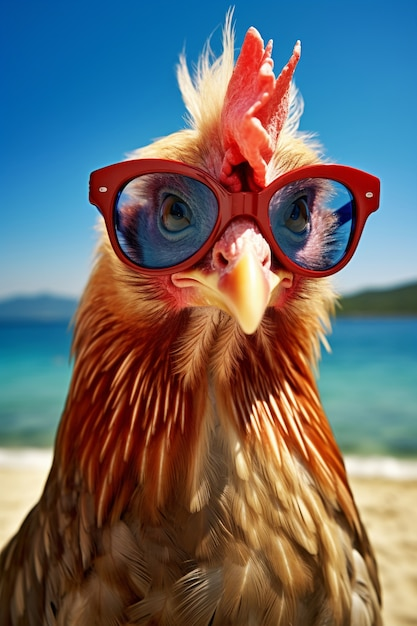

The image depicts a chicken wearing sunglasses, with the ocean and sky visible in the background. The chicken is positioned centrally in the frame, facing forward. It has light-brown feathers on its body and darker orange-brown feathers around its neck. Its beak is yellow, and it wears red-framed sunglasses with blue lenses that reflect the surrounding environment.

In the background, there appears to be a body of water, likely an ocean or sea, as indicated by its blue color and the presence of what seems to be a sandy beach or shore. The sky above is clear and blue, suggesting a sunny day. The overall atmosphere of the image is one of relaxation and leisure, with the chicken's sunglasses adding a touch of humor and playfulness to the scene.

In [8]:
image_url = 'https://img.freepik.com/free-photo/close-up-dressed-up-chicken_23-2150741637.jpg'
display(HTML(f'<img src="{url_to_b64(image_url)}" style="max-height: 300px;"/>'))

result = lvlm.stream(
    [
        {
            'role': 'user',
            'content': [
                {'type': 'image_url', 'image_url': {'url': url_to_b64(image_url)}},
                {'type': 'text', 'text': 'what can you see in the image?'},
            ],
        }
    ]
)

for chunk in result:
    print(chunk.content, end="")

## Prompting your model to perform specific tasks

For some specific task you can do some prompt engineering in order to improve the quality if the model responses

In [9]:
image_path = "data/sample_docs/american-vintage-cars.jpg"
display(HTML(f'<img src="{image_path}" style="max-height: 300px;"/>'))

In [10]:
result = lvlm.invoke(
    [
        {
            'role': 'user',
            'content': [
                {'type': 'image_url', 'image_url': {'url': image_to_base64(image_path)}},
                {'type': 'text', 'text': 'How many cars are in the image?'},
            ],
        }
    ]
)

pprint(result.content)

('The image shows a row of vintage cars parked along a street. The cars are '
 'all facing the same direction, and they appear to be from the 1950s.\n'
 '\n'
 'To count the number of cars in the image, we can start from the left side of '
 'the image and work our way to the right. \n'
 '\n'
 '1. The first car is white and has a distinctive shape with a curved hood and '
 'a large grille.\n'
 '2. The second car is maroon and has a similar shape to the first car.\n'
 '3. The third car is teal and has a slightly different shape than the first '
 'two cars.\n'
 '4. The fourth car is blue and has a similar shape to the third car.\n'
 '5. The fifth car is also blue but has a slightly different shade than the '
 'fourth car.\n'
 '6. The sixth car is red and has a similar shape to the previous cars.\n'
 '7. The seventh car is brown and has a slightly different shape than the '
 'previous cars.\n'
 '8. The eighth car is partially visible and appears to be green or '
 'dark-colored.\n'
 '\n'
 'B

In this case we can se an hallucinated output 
Now lets prompt the model to think step by step and perform as an expert counting system

In [11]:
count_prompt = ("You are an expert counting system, " 
                "How many cars are in the image? " 
                "think step by step in and analyze every part of the image Before providing the answer "
                "you must finalize with Answer:<count>")

result = lvlm.invoke(
    [
        {
            'role': 'user',
            'content': [
                {'type': 'image_url', 'image_url': {'url': image_to_base64(image_path)}},
                {'type': 'text', 'text': count_prompt},
            ],
        }
    ]
)

print(result.content)

The image depicts a row of vintage cars parked along a street, with trees lining the background. The cars are all facing the same direction and appear to be from the 1950s.

To count the number of cars in the image, we can start by identifying the first car on the left side of the image. The first car is white and has a distinctive shape. Moving to the right, we can see a maroon-colored car, followed by a green car, a light blue car, a darker blue car, an orange car, a brown car, and finally, a dark green car.

Let's count the cars:

1. White car
2. Maroon car
3. Green car
4. Light blue car
5. Darker blue car
6. Orange car
7. Brown car
8. Dark green car

There are 8 cars visible in the image.

Answer: 8


We can see the model now is "thinking" identifying each car before giving a final count

This technic is also useful in cases when you need plot and chart understanding

In [12]:
image_path = "data/sample_docs/sample.png"
display(HTML(f'<img src={image_path} style="max-height: 300px;"/>'))

In [13]:
result = lvlm.invoke(
    [
        {
            'role': 'user',
            'content': [
                {'type': 'image_url', 'image_url': {'url': image_to_base64(image_path)}},
                {'type': 'text', 'text': 'how many birds have been seen before 7am?'},
            ],
        }
    ]
)

print(result.content)

To determine the number of birds seen before 7am, we need to look at the data points on the graph that correspond to times before 7am. The x-axis represents the time of day, and the y-axis represents the number of birds.

The first data point on the graph is at 6am, which is before 7am. According to the graph, there are 18 birds at 6am.

Therefore, the number of birds seen before 7am is 18.

**Answer:** 18


Lets ask the model again to perform with a different role and thinking step by step

In [14]:
result = lvlm.invoke(
    [
        {
            'role': 'user',
            'content': [
                {'type': 'image_url', 'image_url': {'url': image_to_base64(image_path)}},
                {'type': 'text', 'text': 'You are an expert chart and plot reader think step by step before giving an answer to the following question: how many birds have been seen before 7am?'},
            ],
        }
    ]
)

print(result.content)

To determine the number of birds seen before 7am, we need to examine the chart and identify the data points that correspond to times earlier than 7am.

The chart displays the number of birds on a tree versus the time of day. The x-axis represents the time of day, ranging from 6am to 4pm, while the y-axis represents the number of birds.

Upon examining the chart, we find that there is one data point at 6am. This data point indicates that 18 birds were observed at 6am.

Since 6am is before 7am, we can conclude that 18 birds were seen before 7am.

Therefore, the number of birds seen before 7am is 18.


## Prompting the model with image reference

This is a typical call to the model in which we pass an image and the query as a text prompt

In [15]:
image_path = "data/sample_docs/sample2.jpg"
display(HTML(f'<img src={image_path} style="max-height: 300px;"/>'))

result = lvlm.invoke(
    [
        {
            'role': 'user',
            'content': [
                {'type': 'image_url', 'image_url': {'url': image_to_base64(image_path)}},
                {'type': 'text', 'text': 'whats the function of the mitochondria?'},
            ],
        }
    ]
)

print(result.content)

The mitochondria is a crucial organelle found in eukaryotic cells, playing a vital role in cellular energy production. Its primary function is to generate most of the cell's supply of adenosine triphosphate (ATP), which is used as a source of chemical energy. In addition to supplying cellular energy, mitochondria are involved in a range of other processes, including:

*   Signaling
*   Cellular differentiation
*   Cell death
*   Cell cycle control

Mitochondria are often referred to as the "powerhouses" of the cell due to their critical role in producing energy for the cell through a process called cellular respiration. This process involves the breakdown of glucose and other organic molecules to produce ATP, which is then used to power various cellular activities.

In the context of the provided image, the mitochondria are depicted as orange structures within the cell, highlighting their importance in maintaining cellular function and overall health.


But we can also highlight or underline information in the image combined with the prompt to get specific responses 

In [16]:
image_path = "data/sample_docs/sample2highlight.jpg"
display(HTML(f'<img src={image_path} style="max-height: 300px;"/>'))

result = lvlm.invoke(
    [
        {
            'role': 'user',
            'content': [
                {'type': 'image_url', 'image_url': {'url': image_to_base64(image_path)}},
                {'type': 'text', 'text': 'whats the function of the highlighted organelle'},
            ],
        }
    ]
)

print(result.content)

The highlighted organelle is the cell membrane, also known as the plasma membrane. The cell membrane is a thin, semi-permeable lipid bilayer that surrounds the cell and regulates the movement of materials in and out of the cell.

**Function of the Cell Membrane:**

*   Controls the exchange of substances between the cell and its environment
*   Maintains cellular homeostasis by regulating the concentration of ions and nutrients
*   Provides structural support and protection to the cell
*   Plays a crucial role in cell signaling and communication with other cells
*   Acts as a barrier to prevent the entry of harmful substances into the cell

In summary, the cell membrane is essential for maintaining cellular integrity and function, and its dysfunction can lead to various diseases and disorders.


We can even ask the question directly in the image 

In [17]:
image_path = "data/sample_docs/sample2question.jpg"
display(HTML(f'<img src={image_path} style="max-height: 300px;"/>'))

result = lvlm.invoke(
    [
        {
            'role': 'user',
            'content': [
                {'type': 'image_url', 'image_url': {'url': image_to_base64(image_path)}}            
            ],
        }
    ]
)

print(result.content)

The image depicts a cell with various organelles and structures. The structure highlighted by the red arrow is labeled as a "Vacuole." Vacuoles are membrane-bound organelles found in cells, particularly plant cells, fungi, and some protists.

**Function of Vacuoles:**

1. **Storage:** Vacuoles act as storage compartments for various substances such as water, salts, minerals, sugars, and waste products.
2. **Maintaining Cell Turgor Pressure:** In plant cells, vacuoles play a crucial role in maintaining cell turgor pressure by storing water and ions.
3. **Recycling and Degradation:** Vacuoles contain digestive enzymes that break down and recycle cellular waste and debris.
4. **pH Regulation:** Vacuoles help regulate the cell's internal pH by storing excess ions and maintaining the proper ionic balance.
5. **Autophagy:** Vacuoles are involved in autophagy, a process where cells recycle their own damaged or dysfunctional components.

In summary, the function of the vacuole is to store vari

## Transcribing and structuring documents

The SambaNova multimodal models can be used also to transcribe text and tables from documents 


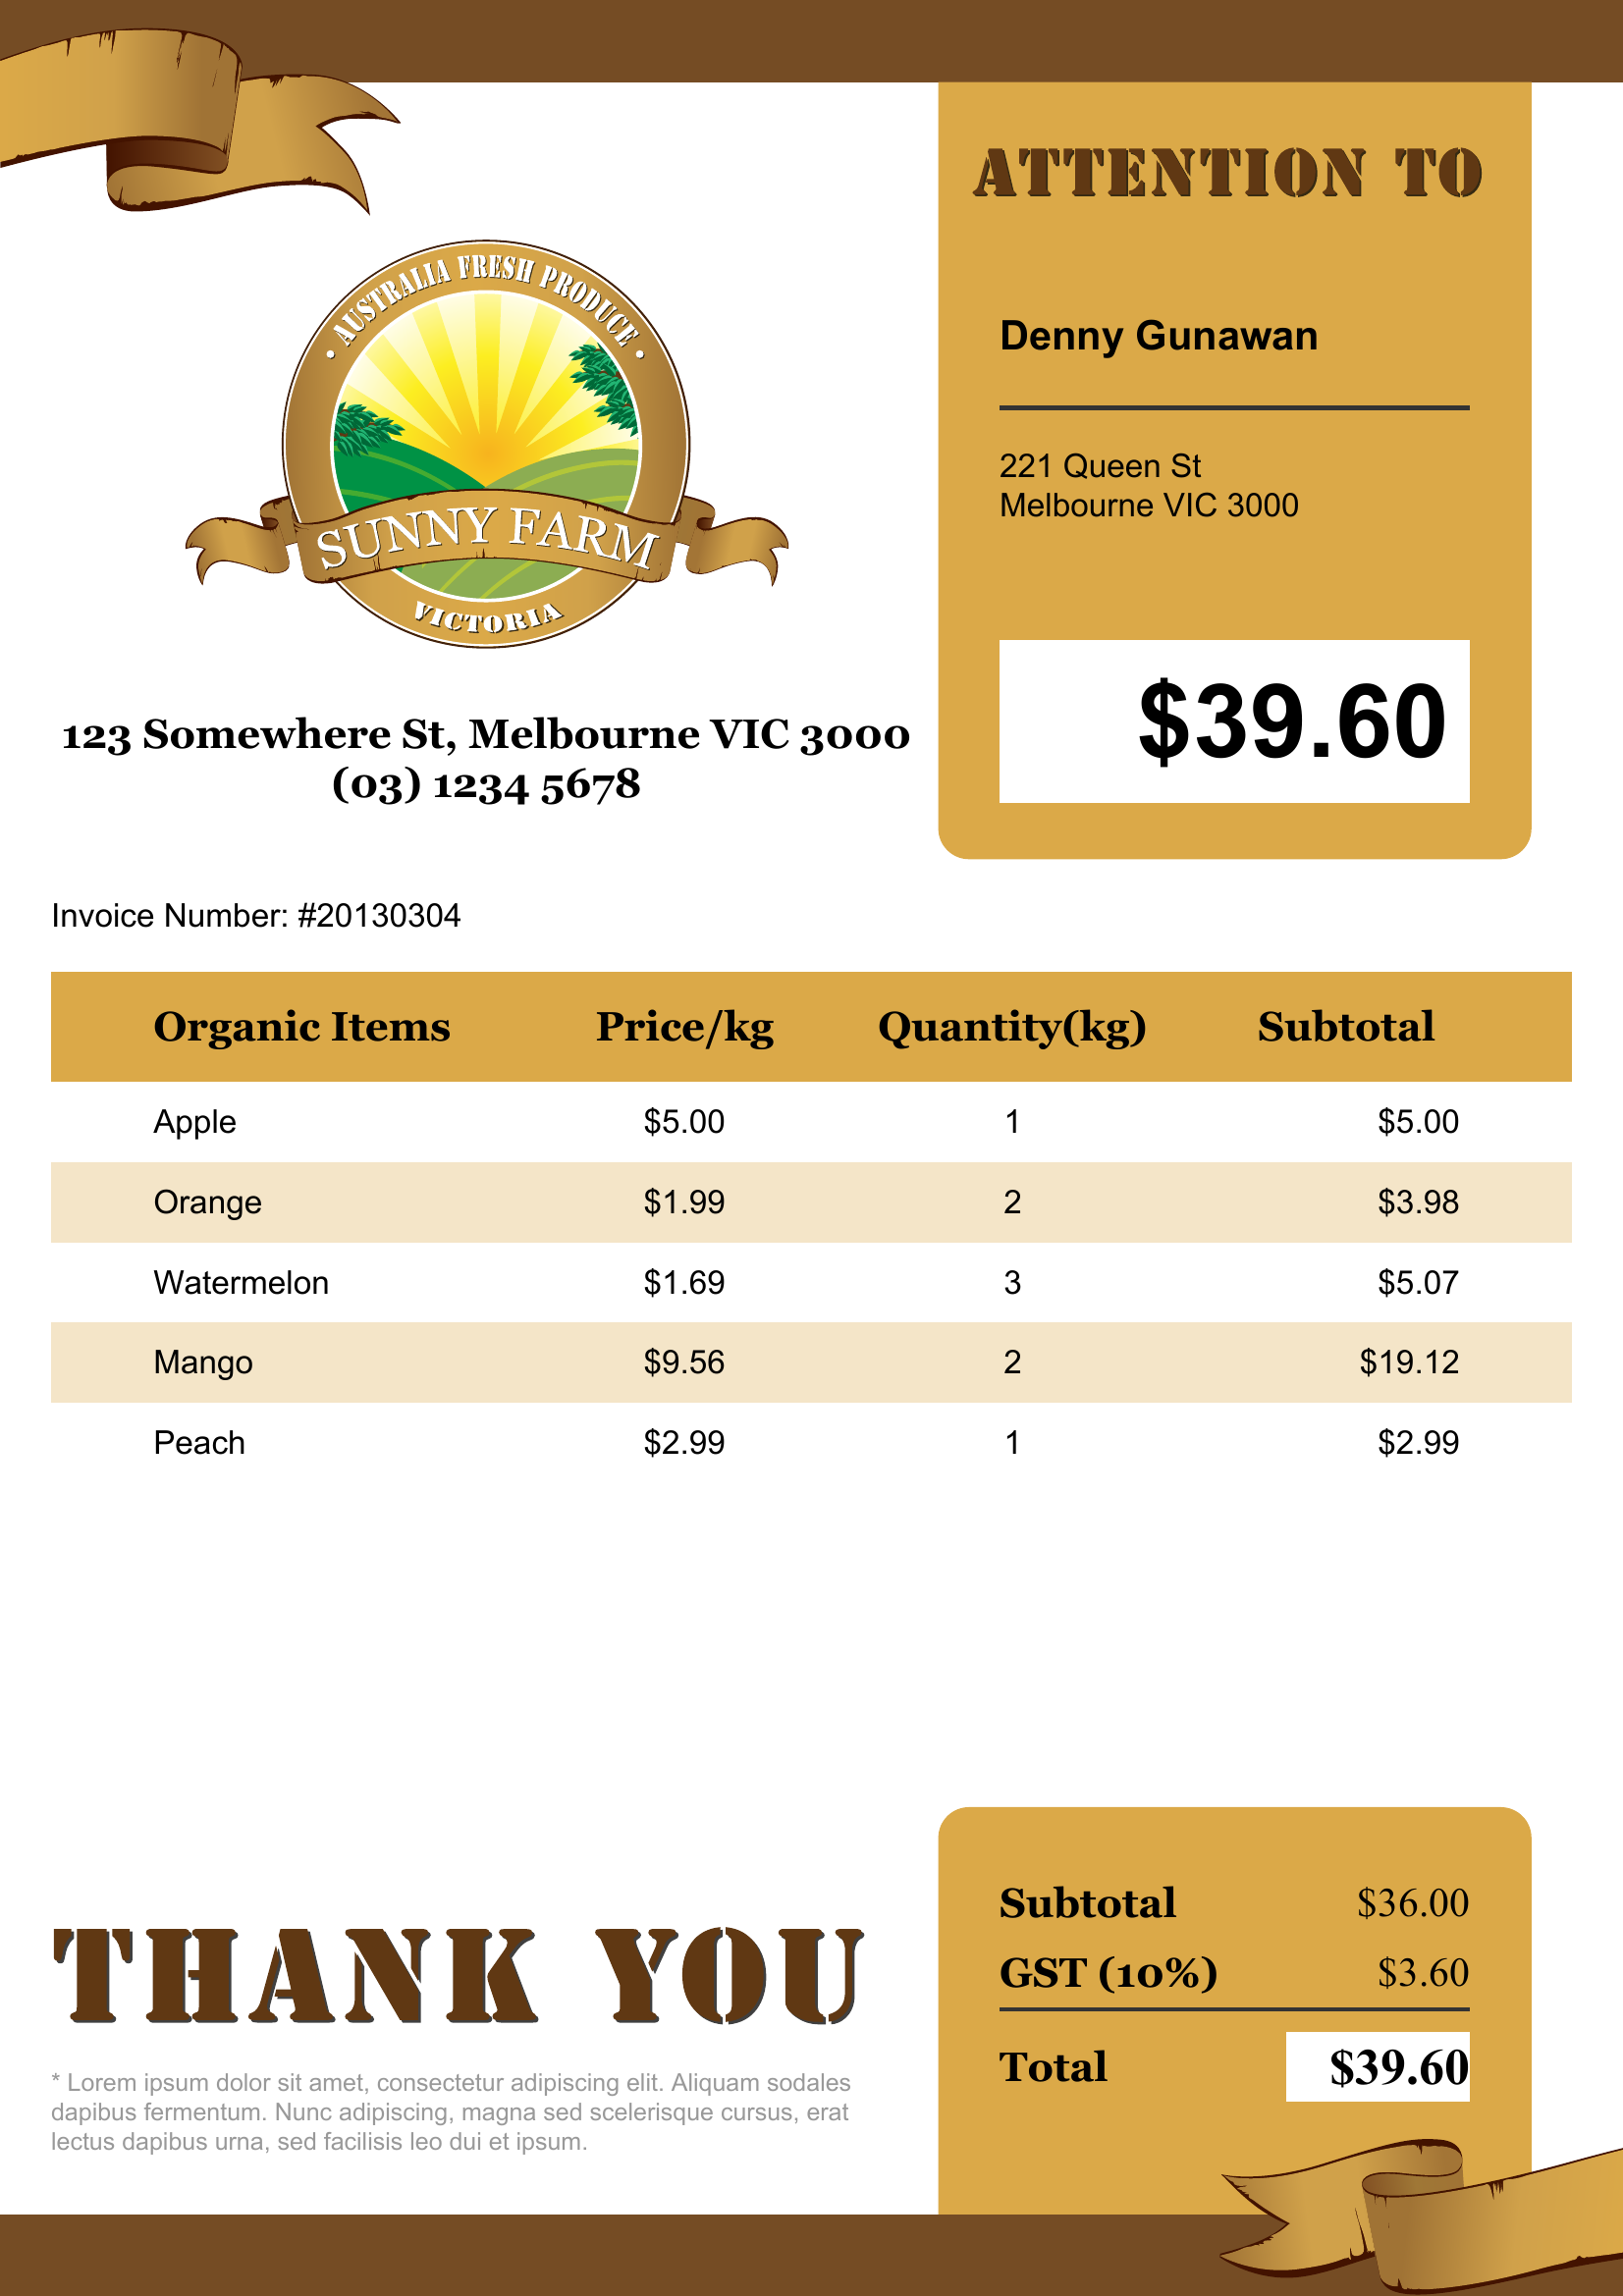

In [23]:
# load PDF document as image in memory
from pdf2image import convert_from_path
import base64
from io import BytesIO

images = convert_from_path(os.path.join(kit_dir,"data/sample_docs/invoicesample.pdf"))

# get first page and convert the image to base64
image = images[0]
buffered = BytesIO()
image.save(buffered, format="PNG")
b64_img = "data:image/png;base64," + base64.b64encode(buffered.getvalue()).decode()

display(HTML(f'<img src="{b64_img}" style="max-height: 450px;"/>'))

In [24]:
result = lvlm.invoke(
    [
        {
            'role': 'user',
            'content': [
                {'type': 'image_url', 'image_url': {'url': b64_img}},
                {'type': 'text', 'text': 'transcribe the text in the image'},
            ],
        }
    ]
)

print(result.content)

The image presents a sample invoice from Sunny Farm, an Australian fresh produce company based in Victoria. The invoice is addressed to Denny Gunawan at 221 Queen St, Melbourne VIC 3000.

**Invoice Details:**

* **Invoice Number:** #20130304
* **Date:** Not specified

**Billing Information:**

* **Company Name:** Sunny Farm
* **Address:** 123 Somewhere St, Melbourne VIC 3000
* **Phone Number:** (03) 1234 5678

**Invoice Summary:**

* **Total Amount:** $39.60

**Invoice Breakdown:**

| Organic Items | Price/kg | Quantity(kg) | Subtotal |
| --- | --- | --- | --- |
| Apple | $5.00 | 1 | $5.00 |
| Orange | $1.99 | 2 | $3.98 |
| Watermelon | $1.69 | 3 | $5.07 |
| Mango | $9.56 | 2 | $19.12 |
| Peach | $2.99 | 1 | $2.99 |

**Subtotal and GST:**

* **Subtotal:** $36.00
* **GST (10%):** $3.60
* **Total:** $39.60

**Additional Text:**

* A placeholder text is provided below the "THANK YOU" section, which is likely intended for a message or note.

Overall, the invoice provides a clear and concis

We can even ask the model to transcribe some structured documents like forms

In [ ]:
image_url = 'https://global.discourse-cdn.com/bubble/original/3X/4/a/4adf3c255f411eaba5bbd1cf2bcd2da5e7ec919d.jpeg'
display(HTML(f'<img src="{url_to_b64(image_url)}" style="max-height: 300px;"/>'))

response = lvlm.invoke(
    [
        {
            'role': 'user',
            'content': [
                {'type': 'image_url', 'image_url': {'url': url_to_b64(image_url)}},
                {'type': 'text', 'text': 'transcribe the form in the image the output shoud be in json format including each field as key: value.\n the output must follow this format\n  ```json\njson```\n\ndo not provide any explanation.},
            ],
        }
    ]
)

print(response)

we can after perform a basic parsing to access to the form fields

In [20]:
def parse_json(str_input):
    json_response = str_input.split("```json")[-1]
    json_response = json_response.replace("```","")
    json_response = json_response.strip()
    return json.loads(json_response)

In [ ]:
form = parse_json(response)
form.get("FakeDoc M.D.").get("HEALTH INTAKE FORM").get("Date")

## Advanced use cases
You can find an extra advanced used case in the [multimodal Enterprise knowledge retriever kit](../multimodal_knowledge_retriever/README.md) in this kit you will find a Retrieval augmented generation application leveraging SambaNova's multimodal models